# Sentiment Analysis
- Use summarized S-1 raw filings
- Add Sentimnet Analysis features
 - Tokenize sentences
 - Use positive and negative sentences

In [55]:
#core
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

import glob
import nasdaq
import ml
from pathlib import Path

#NLP
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load Previous Dataset

In [56]:
#load and sort by date priced
df = pd.read_csv('../Datasets/2 sentiment analysis.csv', index_col='Symbol')

# Integrating IPO Summaries

In [57]:
def get_sentiment_df(text):
    '''returns Sentiment Analysis'''
    sid = SentimentIntensityAnalyzer()
    ps_list = []
    sentences = sent_tokenize(text)
    
    for sentence in sentences:
        ps = sid.polarity_scores(sentence)
        ps['sent'] = sentence
        ps_list.append(ps)
    
    df = pd.DataFrame(ps_list)

    return df

In [58]:
def add_sentiment_features(df_sentiment, symbol):
    '''Adds Sentiment Snalysis features, returns DataFrame'''
    
    #filter frames
    df_tmp = pd.DataFrame()

    #sentences features
    df_tmp.at[symbol, 'Summary Mean Sent Len'] = df_sentiment['sent'].str.len().mean()
    df_tmp.at[symbol, 'Summary Sent Count'] = df_sentiment.shape[0]

    #sentiment
    df_sentiment = df_sentiment[['compound', 'neg', 'neu', 'pos']]
    df_tmp = pd.concat([pd.DataFrame(df_sentiment.mean(), columns=[symbol]).T.add_prefix('Summary Signal '), df_tmp], axis=1)
    
    return df_tmp

In [67]:
#add sentiment features
df_sentiment_features = pd.DataFrame()
counter = 0    

for x in df.index:
    try:
        counter += 1
        print('\n( ' + str(counter) + ' / ' + str(df.shape[0]) + ' ) ' + x)

        #check if summary is available
        file_name = "../Summary/" + x + ".txt"
        if Path(file_name).is_file():
            #load data
            with open(file_name, "r", encoding="utf-8") as file:
                text = file.read()

                #get sentiment
                df_sentiment = get_sentiment_df(text)
                df_sentiment_features = pd.concat([df_sentiment_features, add_sentiment_features(df_sentiment, x)], axis=0)
        else:
            print('no S-1 summary for ', x)
    except Exception as e:
        print(x, e)
        
#combine original data with standardized sentiment features
df1 = pd.concat([ml.standardize(df_sentiment_features), df], axis=1).dropna()        


( 1 / 696 ) AACC

( 2 / 696 ) AAT

( 3 / 696 ) ABR

( 4 / 696 ) ABTX

( 5 / 696 ) ACAD

( 6 / 696 ) ACFC

( 7 / 696 ) ACIA

( 8 / 696 ) ACMR

( 9 / 696 ) ACOR

( 10 / 696 ) ACRX

( 11 / 696 ) ACUS

( 12 / 696 ) ADMS

( 13 / 696 ) ADOM

( 14 / 696 ) ADRO

( 15 / 696 ) ADSW

( 16 / 696 ) ADT

( 17 / 696 ) ADUS

( 18 / 696 ) AEL

( 19 / 696 ) AERI

( 20 / 696 ) AFFY

( 21 / 696 ) AFH

( 22 / 696 ) AIMC

( 23 / 696 ) AIMT

( 24 / 696 ) AIZ

( 25 / 696 ) AJX

( 26 / 696 ) AKAO

( 27 / 696 ) AKBA

( 28 / 696 ) AKER

( 29 / 696 ) AL

( 30 / 696 ) ALDR

( 31 / 696 ) ALDX

( 32 / 696 ) ALGT

( 33 / 696 ) ALRM

( 34 / 696 ) ALRN

( 35 / 696 ) ALSN

( 36 / 696 ) AM

( 37 / 696 ) AMBA

( 38 / 696 ) AMGP

( 39 / 696 ) ANAB

( 40 / 696 ) ANET

( 41 / 696 ) ANGI

( 42 / 696 ) ANTH

( 43 / 696 ) APAM

( 44 / 696 ) APEI

( 45 / 696 ) APKT

( 46 / 696 ) APO

( 47 / 696 ) APPF

( 48 / 696 ) APPN

( 49 / 696 ) APRN

( 50 / 696 ) ARMK

( 51 / 696 ) ARMO

( 52 / 696 ) ARYX

( 53 / 696 ) ASV

( 54 / 696 ) A


( 424 / 696 ) NSM

( 425 / 696 ) NSTG

( 426 / 696 ) NTGR

( 427 / 696 ) NWHM

( 428 / 696 ) NWY

( 429 / 696 ) NXTM

( 430 / 696 ) NYLD

( 431 / 696 ) OAK

( 432 / 696 ) OAS

( 433 / 696 ) OBLN

( 434 / 696 ) OC

( 435 / 696 ) OCUL

( 436 / 696 ) OFSI

( 437 / 696 ) OIS

( 438 / 696 ) OKTA

( 439 / 696 ) OLLI

( 440 / 696 ) OMED

( 441 / 696 ) OMER

( 442 / 696 ) OMPI

( 443 / 696 ) ONCE

( 444 / 696 ) ONDK

( 445 / 696 ) ONTX

( 446 / 696 ) OPESU

( 447 / 696 ) OPGN

( 448 / 696 ) OPHT

( 449 / 696 ) OPTN

( 450 / 696 ) OPTR

( 451 / 696 ) OPTT

( 452 / 696 ) ORC

( 453 / 696 ) ORIT

( 454 / 696 ) OSTK

( 455 / 696 ) OTIC

( 456 / 696 ) OTT

( 457 / 696 ) OUNZ

( 458 / 696 ) OVID

( 459 / 696 ) OXFD

( 460 / 696 ) OZM

( 461 / 696 ) P

( 462 / 696 ) PACB

( 463 / 696 ) PAGP

( 464 / 696 ) PAHC

( 465 / 696 ) PANW

( 466 / 696 ) PAY

( 467 / 696 ) PAYC

( 468 / 696 ) PBF

( 469 / 696 ) PBFX

( 470 / 696 ) PBIB

( 471 / 696 ) PBIP

( 472 / 696 ) PBPB

( 473 / 696 ) PCRX

( 474 / 696 )

In [51]:
df1 = pd.concat([ml.standardize(df_sentiment_features), df], axis=1).dropna()        

In [52]:
#save for later improvements
df1.to_csv('../Datasets/3 summarization.csv', index=True, index_label='Symbol')

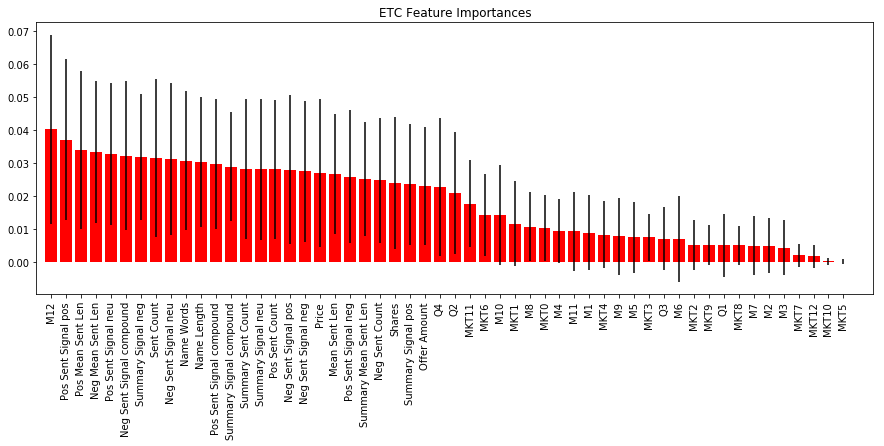

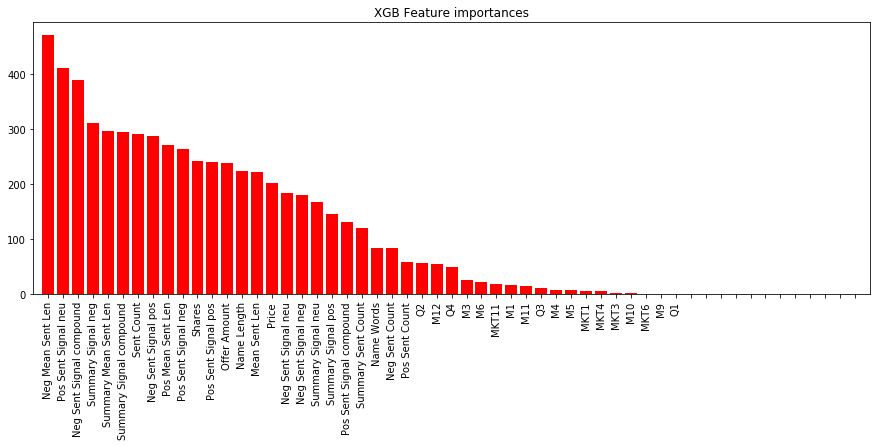

In [53]:
#feature importance
ml.show_feature_importance(df1, '3M')

In [54]:
#now run ML flow with sentiment features for summaries
ml.run_ml_flow(df1)

1D        1W        1M        3M
AUC      LR  0.539319  0.539319  0.539319  0.539319
         RF  0.530908  0.530908  0.530908  0.530908
f1       LR  0.681081  0.681081  0.681081  0.681081
         RF  0.744186  0.744186  0.744186  0.744186
log loss LR  0.676177  0.676177  0.676177  0.676177
         RF  0.661292  0.661292  0.661292  0.661292